In [1]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
import os

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data

,Unnamed: 0,file,speaker,label
0,0,0,Alec Guinness,spoof
1,1,3,Alec Guinness,spoof
2,2,4,Christopher Hitchens,bona-fide
3,3,8,Donald Trump,bona-fide
4,4,12,Calvin Coolidge,bona-fide
...,...,...,...,...
9995,9995,31763,Bill Clinton,bona-fide
9996,9996,31772,Bill Clinton,bona-fide
9997,9997,31773,Alan Watts,spoof
9998,9998,31774,Boris Johnson,bona-fide


In [1]:
del data['Unnamed: 0']

NameError: name 'data' is not defined

In [5]:
data

,file,speaker,label
0,0,Alec Guinness,spoof
1,3,Alec Guinness,spoof
2,4,Christopher Hitchens,bona-fide
3,8,Donald Trump,bona-fide
4,12,Calvin Coolidge,bona-fide
...,...,...,...
9995,31763,Bill Clinton,bona-fide
9996,31772,Bill Clinton,bona-fide
9997,31773,Alan Watts,spoof
9998,31774,Boris Johnson,bona-fide


In [6]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


## Preprocessing Steps

**Resampling:** The audio is resampled to a target sample rate (target_sr) using `librosa.resample()` if the original sample rate is different.

**Trimming Silence:** The `librosa.effects.trim` function is employed to remove any silent portions at the beginning and end of the audio. This ensures that only the significant part of the audio is processed, eliminating unnecessary silence.

**Padding the Audio:**

- If the trimmed audio is shorter than the desired 10-second length, the difference (`padding`) is calculated.
- The `np.pad` function is used to add zeros (representing silence) to the end of the audio, extending it to exactly 10 seconds.
- If the audio is longer than 10 seconds, it is truncated to match the required length.

**Normalizing the Audio:** The `librosa.util.normalize` function normalizes the audio to a consistent amplitude range, scaling it so that the maximum absolute amplitude is 1. This step is crucial to ensure uniform volume levels across different audio samples.


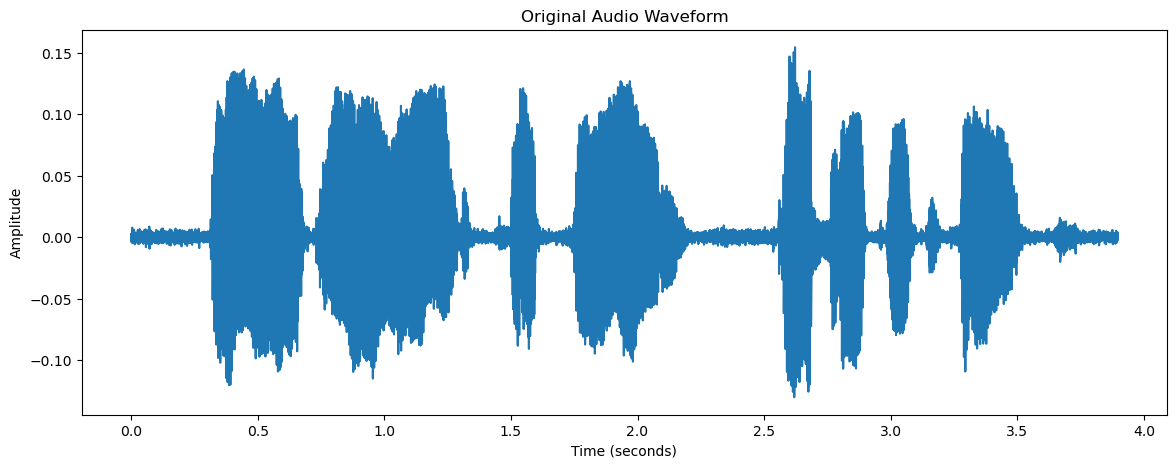

In [8]:
# Load the audio file
file_path = r"C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\dataset\12.wav"
audio, sr = librosa.load(file_path, sr=22050)

# Visualize the waveform before preprocessing
# Create a time axis in seconds
time_axis = np.linspace(0, len(audio) / sr, num=len(audio))

# Visualize the waveform with time on the X-axis
plt.figure(figsize=(14, 5))
plt.title("Original Audio Waveform")
plt.plot(time_axis, audio)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [9]:
len(audio)

85909

In [10]:
# Set the maximum length of the audio to 10 seconds
# Since the sampling rate is 22050 Hz, 10 seconds corresponds to 220500 samples
max_length = 22050 * 10

# Trim silence from the beginning and end of the audio
# The 'librosa.effects.trim' function removes silent parts of the audio
# based on a threshold, returning the trimmed audio and the index of the non-silent portion.
audio_trimmed, _ = librosa.effects.trim(audio)

# Check if the trimmed audio is shorter than the desired maximum length (10 seconds)
if len(audio_trimmed) < max_length:
    # Calculate the amount of padding needed to reach the desired length
    padding = max_length - len(audio_trimmed)
    # Pad the audio with zeros (silence) at the end to reach 10 seconds
    # The 'np.pad' function is used with mode='constant' to add zeros
    audio_trimmed = np.pad(audio_trimmed, (0, padding), mode='constant')
else:
    # If the audio is longer than 10 seconds, truncate it to the desired length
    audio_trimmed = audio_trimmed[:max_length]

# Normalize the audio to have a consistent amplitude range
# The 'librosa.util.normalize' function scales the audio signal so that its amplitude 
# lies between -1 and 1, ensuring a uniform volume level.
audio_normalized = librosa.util.normalize(audio_trimmed)

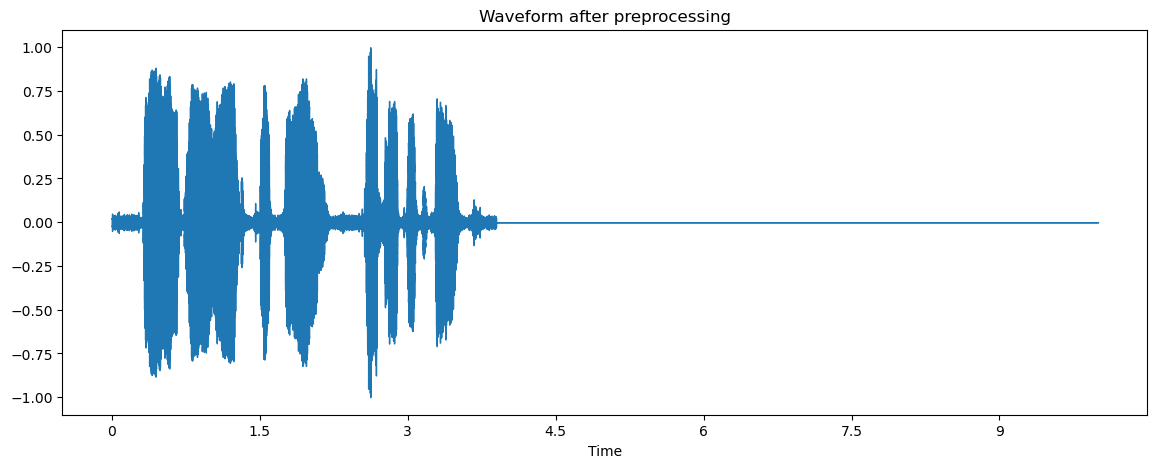

In [11]:
# Visualize the waveform after preprocessing
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_normalized, sr=sr)
plt.title("Waveform after preprocessing")
plt.show()

In [12]:
# Path to the dataset
dataset_dir = 'C:\\Users\\ASUS\\Desktop\\clg\\AI CLUB\\AI_voice_detection\\dataset'
output_dir = 'C:\\Users\\ASUS\\Desktop\\clg\\AI CLUB\\AI_voice_detection\\preprocessed_dataset'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to preprocess audio
def preprocess_audio(file_path, target_sr=22050, max_length=10):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Resample to target sample rate
        if sr != target_sr:
            y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
        
        # Normalize audio
        y = librosa.util.normalize(y)
        
        # Trim silence
        y, _ = librosa.effects.trim(y)
        
        # Ensure the audio length is max_length seconds
        max_len_samples = target_sr * max_length
        if len(y) > max_len_samples:
            y = y[:max_len_samples]
        else:
            y = np.pad(y, (0, max_len_samples - len(y)))
        
        return y, target_sr
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

# Iterate over the audio files in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.wav'):
        file_path = os.path.join(dataset_dir, filename)
        y, sr = preprocess_audio(file_path)
        if y is not None:
            # Save the preprocessed audio
            output_path = os.path.join(output_dir, filename)
            sf.write(output_path, y, sr)
            print(f"Processed and saved: {output_path}")
        else:
            print(f"Failed to process: {file_path}")

print("Preprocessing completed.")

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\0.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10006.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10011.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10013.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10014.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10016.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10017.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1002.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10023.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_vo

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10254.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10270.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10272.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10276.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1028.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10283.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10284.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10289.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1029.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10492.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10493.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10496.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1050.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10500.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10505.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10506.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10513.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10514.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10800.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10802.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10813.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10817.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10818.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10823.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10824.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10826.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\10827.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11021.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11025.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11028.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1103.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11031.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11037.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11045.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1105.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11050.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11259.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1126.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11260.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11267.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1127.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11270.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11272.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11273.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11278.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11519.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11520.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11521.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11529.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1153.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11530.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11531.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11532.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11534.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11789.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11790.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11791.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11798.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\118.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11800.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11802.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11808.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11809.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11976.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11977.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1198.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11982.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11983.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11988.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11994.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11996.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\11997.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12220.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12221.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12227.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12228.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12229.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12231.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12232.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12237.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12238.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12465.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12471.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12474.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12476.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12479.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12481.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12484.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12486.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12487.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12714.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12716.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1272.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12720.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12723.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12724.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12729.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1273.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12730.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1293.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12930.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12935.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12936.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12938.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12939.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12946.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12947.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\12948.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13161.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13163.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13165.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13168.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13170.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13171.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13172.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13175.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13181.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13416.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13417.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13418.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13426.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13432.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13433.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13437.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13439.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13441.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13668.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13669.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13671.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13674.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13675.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13676.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13677.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13681.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13683.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13893.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13898.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13899.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13901.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13903.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13904.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13907.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13910.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\13913.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14140.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14141.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14147.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14148.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14149.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14156.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14157.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14159.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1416.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14392.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14393.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14396.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14401.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14402.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14405.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14407.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14409.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14412.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1462.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14620.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14623.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1463.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14630.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14631.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14637.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14645.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14648.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14872.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14873.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14875.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14877.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14879.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14880.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14881.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14883.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\14884.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15093.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15094.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1510.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15100.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15102.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15106.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15109.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15110.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15114.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15340.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15342.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15343.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15348.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15350.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15356.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15359.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15360.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15361.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15545.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15552.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15555.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15556.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15564.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15565.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15571.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15582.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15584.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15785.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15786.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15788.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15789.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15790.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15791.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15793.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15794.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\15797.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16034.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16039.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16042.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16043.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16045.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16046.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16048.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16066.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1607.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16334.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1634.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16340.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16342.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16343.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16348.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16349.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16351.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16353.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1656.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1657.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16574.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16578.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16580.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16581.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16583.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16585.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16586.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16781.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16783.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16786.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1679.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16792.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16793.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16794.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16801.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\16809.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17039.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17042.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17051.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17054.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17061.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17071.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17073.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17074.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17075.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1726.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17262.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17265.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17269.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1727.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17274.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17275.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17278.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17279.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17512.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17515.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17516.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17530.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17531.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17532.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17533.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17547.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17550.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17793.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17794.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17795.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17797.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17800.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17802.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17808.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17812.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\17816.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18061.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18062.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18063.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18064.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18067.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18068.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18069.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18071.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18079.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18305.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18307.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18318.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18319.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1832.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18320.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18321.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18323.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18326.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18545.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18548.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18552.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18553.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18554.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18556.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18558.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1856.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18562.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18827.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18828.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1883.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18830.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18831.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18834.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18843.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18844.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\18851.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19061.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19065.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19067.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19069.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19070.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19073.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19074.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19075.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19078.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19297.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19299.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1930.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19301.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19303.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19304.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19305.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19306.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19307.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\1957.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19570.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19571.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19572.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19575.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19576.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19578.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19579.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19580.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19802.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19806.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19809.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19812.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19813.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19814.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19824.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19826.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\19828.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20051.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20053.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20054.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20057.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2006.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20063.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20067.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20069.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2007.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20274.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20278.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20283.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20284.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20285.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20288.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20289.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2029.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20291.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20478.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20482.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20483.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20484.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20486.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20490.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20492.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20495.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20496.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2071.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20717.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20720.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20725.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20727.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20735.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20739.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2074.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20751.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20943.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20944.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20947.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2095.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20954.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20956.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20957.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\20959.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2096.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21168.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2117.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21173.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21174.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21177.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21179.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21186.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2119.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21190.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21441.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21445.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21446.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21447.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21448.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21449.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21452.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21458.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21459.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21663.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21664.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21666.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21672.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21675.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21677.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21685.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21688.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21691.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21869.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2187.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21870.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21872.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21875.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21878.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21879.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21880.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\21886.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22137.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22139.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22141.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22142.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22145.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22147.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2215.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22152.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22160.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22394.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22396.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22398.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\224.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2240.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22400.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22405.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22408.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22409.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22645.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22646.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22647.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22652.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22653.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22657.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2266.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22660.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22666.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22866.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22869.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22871.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22872.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22878.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2288.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22882.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22883.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\22884.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23108.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2311.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23111.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23116.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23119.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23121.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23122.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23124.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23125.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2333.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23331.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23335.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23338.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23348.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23352.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23355.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23356.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23365.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23576.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23577.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23584.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23585.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23587.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2359.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23591.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23592.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23596.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23785.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23786.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23790.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23791.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23792.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23793.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23794.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23798.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\23801.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24027.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24028.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24034.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24037.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24042.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24044.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24046.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24047.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24049.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24274.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24280.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24287.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24293.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24294.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24295.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24298.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24299.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24304.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24556.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24559.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2456.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24560.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24566.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24568.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24569.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24571.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24572.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24779.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24781.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24785.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24792.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24793.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24794.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24795.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24803.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\24807.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25014.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25015.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25022.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25026.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25027.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25028.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25031.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25033.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25035.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25258.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25263.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25265.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25268.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25269.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25270.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25271.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25274.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25275.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25515.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25520.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25521.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25522.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25523.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25528.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25532.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2554.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25546.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25779.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2578.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25780.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25781.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25786.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25788.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25790.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25792.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\25796.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26034.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26036.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26037.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26038.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26043.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26044.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26045.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26048.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26052.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26269.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2627.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26272.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26277.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26279.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2628.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26282.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26285.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26286.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26502.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26506.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26509.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26512.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26514.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26520.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26525.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26531.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26532.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26737.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26742.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26743.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26746.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26748.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26752.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26753.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26763.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\26765.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27006.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27008.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2701.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27023.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27026.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2703.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27034.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27038.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27039.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2721.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27211.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27212.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27222.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27223.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27224.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27225.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27230.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27231.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2747.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27471.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27473.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27474.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27475.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27477.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2748.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27484.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27485.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27703.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27704.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27707.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27708.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27709.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2771.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27712.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27714.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27717.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27954.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27955.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27958.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27967.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27968.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27970.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27971.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27974.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\27975.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28202.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28208.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28210.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28211.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28213.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28216.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28217.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28222.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28224.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2842.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28423.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28426.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28429.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28430.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28434.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28436.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28438.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2844.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28673.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28674.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28676.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28680.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28683.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28693.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28695.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28699.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\287.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28915.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28916.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28928.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28930.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28933.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28936.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28939.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28944.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\28952.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29167.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29168.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29172.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29174.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29175.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29187.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29190.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29191.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29194.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29421.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29423.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29430.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29432.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29436.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29437.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29442.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2945.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29453.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29741.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29746.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29750.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29754.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29755.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29757.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29762.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\2977.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\29776.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30002.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30007.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30009.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30010.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30015.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30016.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30020.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30028.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30030.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30297.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30298.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30299.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30303.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30306.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30308.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30309.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30311.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30312.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30521.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30523.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30525.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30527.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30529.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30533.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30535.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30536.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30537.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30755.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30756.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30763.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30767.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3077.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30773.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30776.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30781.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\30787.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31035.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31036.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31040.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31046.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3105.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31050.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31051.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31056.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31059.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31293.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31299.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31303.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31309.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3131.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31311.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31322.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31323.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31324.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31529.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3153.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31531.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31537.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31538.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31539.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31541.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31544.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\31549.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\A

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\319.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3190.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3193.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3195.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3198.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3199.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3200.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3213.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3214.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\342.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3423.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3439.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3441.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3443.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3444.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3451.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3452.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3454.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3668.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3670.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3671.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3678.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3679.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3680.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3684.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3686.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3688.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3913.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3916.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3922.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3929.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3930.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3933.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3936.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3938.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\3939.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\414.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4141.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4148.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4149.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4150.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4154.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4156.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4159.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\416.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_de

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4359.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4361.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4362.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4366.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4372.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4373.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4379.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4380.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4381.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4620.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4621.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4623.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4631.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4641.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4642.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4647.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4649.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4650.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4872.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4876.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4878.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4881.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4884.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4885.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4888.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\4889.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\489.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5154.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5157.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5161.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5166.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5167.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\517.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5173.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5175.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5179.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5426.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5431.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5433.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5437.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5439.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5444.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5445.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\545.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5454.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5667.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\567.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5670.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5673.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5674.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5675.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\568.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5682.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5685.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_de

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5877.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5878.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5882.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5895.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5896.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5897.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5902.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5903.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\5904.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\612.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6123.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6133.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6135.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6137.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\614.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6145.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\615.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6151.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_det

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6326.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\633.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6331.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6334.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6336.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6339.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6342.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6344.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6346.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_d

Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6572.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6578.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6581.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6587.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6589.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6591.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6593.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6594.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_detection\preprocessed_dataset\6597.wav
Processed and saved: C:\Users\ASUS\Desktop\clg\AI CLUB\AI_voice_

KeyboardInterrupt: 

# Feature Extraction
## 1. MFCC (Mel-Frequency Cepstral Coefficients)

MFCCs represent the short-term power spectrum of a sound signal. They are derived by applying a cosine transform to the log power spectrum on a nonlinear mel scale of frequency. This process captures the timbral texture of audio, which is crucial for distinguishing different types of sounds and voices.

- **Derivation**: MFCCs are computed by first dividing the audio signal into short overlapping frames. For each frame, the power spectrum is calculated, then transformed to the mel scale. Finally, the discrete cosine transform is applied to the log power spectrum to obtain the MFCCs.

- **Importance**: MFCCs capture the essential characteristics of the sound signal's frequency distribution. They are widely used in speech and audio recognition tasks due to their ability to effectively represent the phonetic content of speech.

- **Applications**: MFCCs are commonly used in automatic speech recognition (ASR), speaker identification, and music genre classification.
## 2. Chroma Features

Chroma features, or chromagrams, represent the 12 different pitch classes (semitones) of the musical octave. Each pitch class corresponds to a specific frequency range, regardless of the octave. These features are useful for capturing the harmonic and tonal content of audio.

- **Derivation**: Chroma features are obtained by mapping the frequencies of the audio signal to the 12 pitch classes of the chromatic scale. This mapping is done by summing the energy in each pitch class over time, resulting in a chromagram that represents the distribution of these pitch classes.

- **Importance**: Chroma features are valuable for tasks involving music and speech analysis because they capture the harmonic structure of audio signals. This makes them useful for identifying musical keys, chords, and tonal patterns.

- **Applications**: Chroma features are used in music information retrieval (MIR), key and chord recognition, and melody extraction.
## 3. Zero Crossing Rate (ZCR)

Zero Crossing Rate (ZCR) is the rate at which the audio signal changes sign from positive to negative or vice versa. It is a measure of the frequency content of the signal and provides insights into the noisiness and temporal properties of the audio signal.

- **Derivation**: ZCR is calculated by counting the number of times the signal crosses zero within a given frame or window. This rate is then averaged over time to obtain the ZCR value.

- **Importance**: ZCR is useful for distinguishing between different types of audio signals. It provides information about the signal's noisiness and can help in differentiating between voiced and unvoiced speech, or between natural and synthetic audio.

- **Applications**: ZCR is commonly used in speech and audio processing applications, including speech recognition, sound classification, and audio signal analysis.


In [ ]:
# Function for extracting MFCC, Chroma, and ZCR features
def extract_features(file_path, duration=3, sr=22050, n_mfcc=13):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=sr, duration=duration)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # Extract Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Extract Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)

        # Combine features
        features = np.hstack((mfccs_mean, chroma_mean, zcr_mean))

        return features

    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        print(str(e))
        return None

In [ ]:
# Define paths
folder_path = "C:/Users/ASUS/Desktop/clg/AI CLUB/AI_voice_detection/preprocessed_dataset"
feature_csv_path = "features.csv"

# Initialize list to store features
features_list = []
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Extract features from each file
for file_name in file_names:
    try:
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            print(f"Features extracted from {file_name}")
        else:
            print(f"Failed to extract features for {file_name}")

    except Exception as e:
        print(f"Error processing file: {file_name}")
        print(str(e))

# Define column names
n_mfcc = 13
n_chroma = 12  # Number of Chroma features
mfcc_columns = [f"mfcc_{i+1}" for i in range(n_mfcc)]
chroma_columns = [f"chroma_{i+1}" for i in range(n_chroma)]
zcr_columns = ["zcr"]

# Combine all column names
columns = mfcc_columns + chroma_columns + zcr_columns

# Convert features list to a DataFrame with column names
features_df = pd.DataFrame(features_list, columns=columns)

# Save features to CSV
features_df.to_csv(feature_csv_path, index=False)
print(f"Features saved to {feature_csv_path}")

In [ ]:
# Define the path to the existing dataset
dataset_csv_path = "dataset.csv"
combined_csv_path = "combined_dataset.csv"

# Load the existing dataset
dataset_df = pd.read_csv(dataset_csv_path)

# Load the new features
features_df = pd.read_csv(feature_csv_path)

# Assuming that the order of files in both CSVs matches, combine them
combined_df = pd.concat([dataset_df, features_df], axis=1)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(combined_csv_path, index=False)


In [ ]:
df = pd.read_csv("combined_dataset.csv")
df